# <font color='k' style='font-size: 38px; font-weight: bold'>Data Science -  Covid-19</font>
<hr style='border: 5px solid red;'>


## O Dataset e o Projeto
<hr>

### Fonte: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados coletados são de origem do repositório Johns Hopkins CSSEGISandData/COVID-19 no github. Utilizarei o dataset para estudo e desenvolvimento em Data Science, com base nos cursos realizados na Alura Cursos de Tecnologia.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo será de explorar e analisar o dataset, gerar gráficos que representem a situação do Covid-19 no mundo. A coleta dos dados são de responsabilidade de cada país, portanto não há um critério padrão para as classificações das variavéis do estudo. Serão respeitados os critérios classificados no dataset, conforme atualização do repositório.</p>


### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Estado</b></li>
    <li><b>Pais</b></li>
    <li><b>Lat</b> - Latitude</li>
    <li><b>Long</b> - Longitude</li>
    <li><b>Datas</b> - Datas e seus respectivos números de infectados</li>
  </ul>

## Leitura dos dados

In [1]:
import pandas as pd

In [2]:
covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475


In [3]:
covid = covid.rename(columns={'Province/State':'Estado', 'Country/Region':'Pais'})
covid.head()

,Estado,Pais,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475


In [4]:
covid.dtypes

Estado      object
Pais        object
Lat        float64
Long       float64
1/22/20      int64
            ...   
9/20/20      int64
9/21/20      int64
9/22/20      int64
9/23/20      int64
9/24/20      int64
Length: 251, dtype: object

In [5]:
covid['Pais'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

## Casos confirmados no Brasil

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Utilizarei por base a variável Pais, já que as variáveis Estados não foram todos mencionados no dataset, existem dados imcompletos/faltantes.</p>


In [6]:
casos_confirmados_covid = covid.groupby('Pais').sum()
casos_confirmados_covid.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
Pais,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475


In [7]:
casos_confirmados_covid.loc['Brazil'][2:]

1/22/20          0.0
1/23/20          0.0
1/24/20          0.0
1/25/20          0.0
1/26/20          0.0
             ...    
9/20/20    4544629.0
9/21/20    4558040.0
9/22/20    4591364.0
9/23/20    4591364.0
9/24/20    4657702.0
Name: Brazil, Length: 247, dtype: float64

In [8]:
data_atual = casos_confirmados_covid.loc['Brazil'][-1:]
data_atual

9/24/20    4657702.0
Name: Brazil, dtype: float64

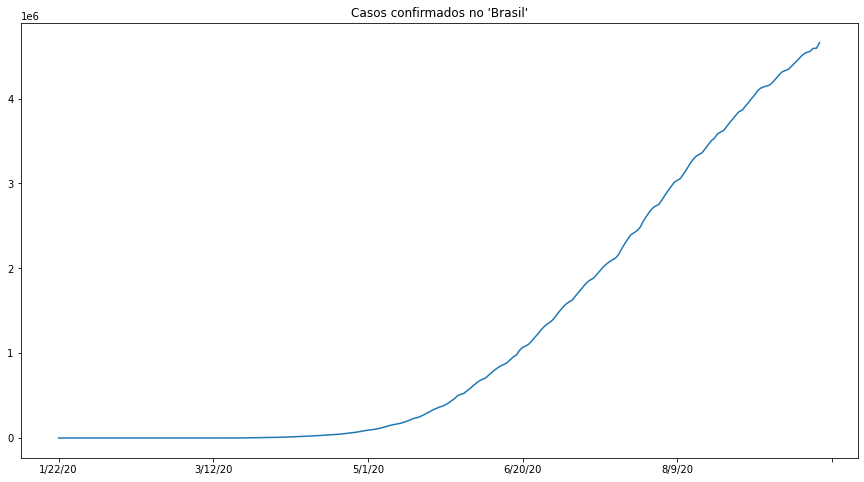

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
casos_confirmados_covid.loc["Brazil"][2:].plot()
plt.title("Casos confirmados no 'Brasil'")
plt.show()

## Casos novos no Brasil

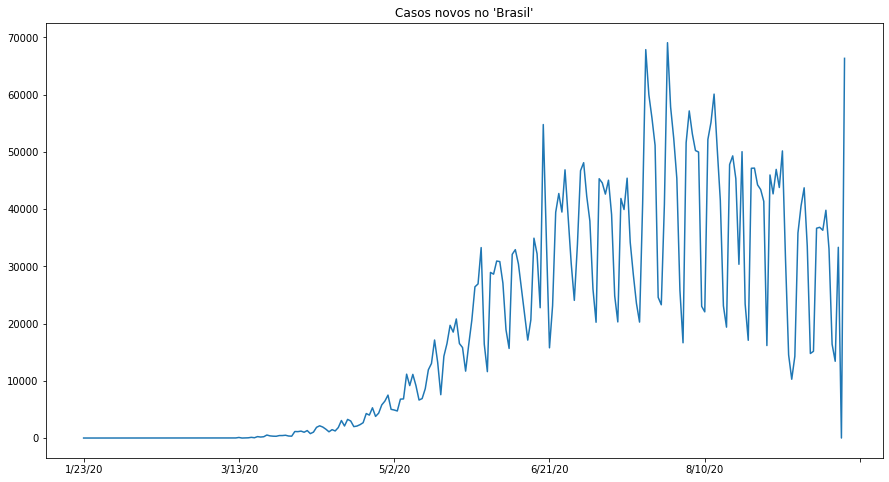

In [10]:
plt.figure(figsize=(15,8))
plt.title("Casos novos no 'Brasil'")
novos_casos_confirmados_covid_brasil = casos_confirmados_covid.loc["Brazil"][2:].diff().dropna()
novos_casos_confirmados_covid_brasil.plot()

## Casos confirmados por Pais na data atual:
#### Digitar Data


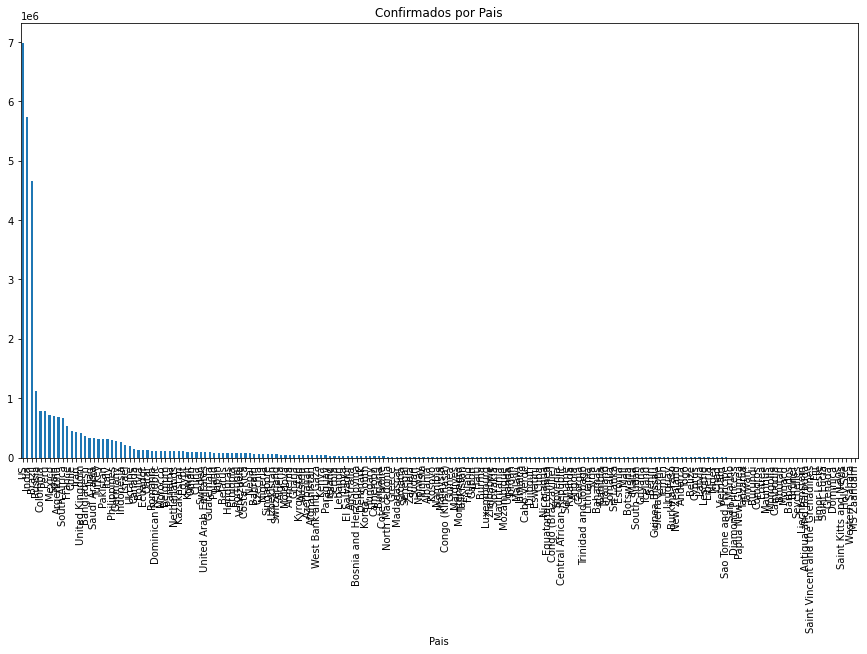

In [11]:
data = '9/24/20'

plt.figure(figsize=(15,8))
plt.title("Confirmados por Pais")

casos_confirmados_covid[data].sort_values(ascending=False).plot(kind='bar')
plt.show()



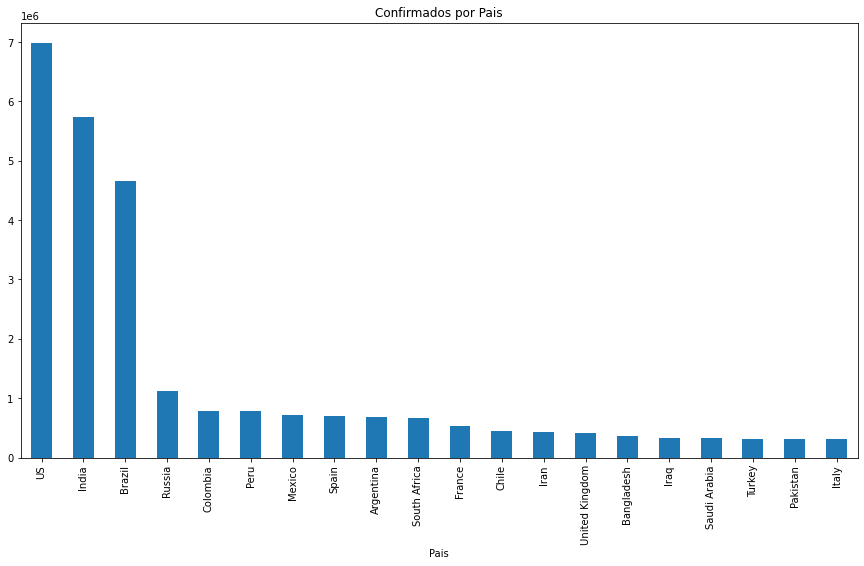

In [12]:
plt.figure(figsize=(15,8))
plt.title("Confirmados por Pais")

casos_confirmados_covid[data].sort_values(ascending=False)[:20].plot(kind='bar')
plt.show()

# visualizando os 20 paises com casos confirmados na data mencionada.
# podem ter paises com maiores números de casos que não foram testados, e ocorreram na data mencionada. 

## Casos de Mortes e Recuperados

In [13]:
casos_mortes_covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
casos_recuperados_covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

casos_mortes_covid = casos_mortes_covid.rename(columns={'Province/State':'Estado', 'Country/Region':'Pais'})
casos_recuperados_covid = casos_recuperados_covid.rename(columns={'Province/State':'Estado', 'Country/Region':'Pais'})

display(casos_mortes_covid.head())
display(casos_recuperados_covid.head())

,Estado,Pais,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446,1451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364,367,370,370
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1370,1379,1391,1402,1411,1418,1424,1435,1446,1456,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679,1689,1698,1703
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,88,88,90,92,93,94,94,96,100,102,103,105,106,107,107,108,109,112,113,115,117,117,120,124,126,130,131,132,134,136,139,143,144,147,147,152,154,155,159,162


,Estado,Pais,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576,32576,32610,32619
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995,7042,7139,7239
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27017,27347,27653,27971,28281,28587,28874,29142,29369,29587,29886,30157,30436,30717,30978,31244,31493,31746,32006,32259,32481,32745,32985,33183,33379,33562,33723,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180,35307,35428,35544
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,863,869,869,875,875,875,875,875,877,877,893,893,902,902,902,908,908,909,909,928,928,928,934,934,938,938,943,943,943,945,945,1054,1054,1164,1164,1164,1199,1199,1203,1203
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,628,632,667,698,742,804,814,818,877,977,977,1335,1028,1041,1063,1071,1084,1115,1144,1167,1192,1198,1215,1215,1245,1277,1288,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449,1462,1473,1503


## Concatenando os casos confirmados, de mortes e recuperados.

In [14]:
def data_atual_por_pais (data):
  return data.groupby('Pais').sum().iloc[:,-1]

display(data_atual_por_pais(casos_confirmados_covid.head()))
display(data_atual_por_pais(casos_mortes_covid.head()))
display(data_atual_por_pais(casos_recuperados_covid.head()))    

Pais
Afghanistan    39170
Albania        12921
Algeria        50579
Andorra         1753
Angola          4475
Name: 9/24/20, dtype: int64

Pais
Afghanistan    1451
Albania         370
Algeria        1703
Andorra          53
Angola          162
Name: 9/24/20, dtype: int64

Pais
Afghanistan    32619
Albania         7239
Algeria        35544
Andorra         1203
Angola          1503
Name: 9/24/20, dtype: int64

In [15]:
casos_de_covid = [data_atual_por_pais(casos_confirmados_covid) , data_atual_por_pais(casos_mortes_covid), data_atual_por_pais(casos_recuperados_covid)]
casos_totais = pd.concat(casos_de_covid, axis=1)
casos_totais.columns = ['confirmados', 'mortes', 'recuperados']
casos_totais.head()                                                                                                                              

,confirmados,mortes,recuperados
Pais,,,
Afghanistan,39170,1451,32619
Albania,12921,370,7239
Algeria,50579,1703,35544
Andorra,1753,53,1203
Angola,4475,162,1503


## Taxa de letalidade

#### É complicado durante a epidemia levantar a taxa de letalidade pois até os primeiros casos serem descobertos, a epidemia não é classificada corretamente. E respeitando os critérios classificatórios, existem casos de mortes que não são identificados ou não foram confirmados como sendo da epidemia.

In [20]:
resumo = casos_totais.sum()
taxa_de_letalidade_confirmada = resumo['mortes'] / resumo['confirmados'] * 100
taxa_de_letalidade_em_recuperacao = resumo['mortes'] / (resumo['recuperados'] + resumo['mortes']) * 100
print(taxa_de_letalidade_confirmada) # taxa das mortes confirmadas
print(taxa_de_letalidade_em_recuperacao) # taxa das mortes por casos que estão em recuperação, uma estimativa pois não sabemos se irá recuperar ou morrer

3.0546688870757106
4.244167591639533


In [21]:
taxa_de_letalidade_confirmada = casos_totais['mortes'] / casos_totais['confirmados'] * 100
taxa_de_letalidade_em_recuperacao = casos_totais['mortes'] / (casos_totais['recuperados'] + casos_totais['mortes']) * 100
casos_totais['taxa_de_letalidade_confirmada'] = taxa_de_letalidade_confirmada
casos_totais['taxa_de_letalidade_em_recuperação'] = taxa_de_letalidade_em_recuperacao
casos_totais.head(10)

,confirmados,mortes,recuperados,taxa_de_letalidade_confirmada,taxa_de_letalidade_em_recuperação
Pais,,,,,
Afghanistan,39170,1451,32619,3.704366,4.258879
Albania,12921,370,7239,2.863555,4.862663
Algeria,50579,1703,35544,3.367010,4.572180
Andorra,1753,53,1203,3.023388,4.219745
Angola,4475,162,1503,3.620112,9.729730
Antigua and Barbuda,97,3,92,3.092784,3.157895
Argentina,678266,14766,536589,2.177022,2.678129
Armenia,48251,945,43266,1.958509,2.137477
Australia,27000,869,24521,3.218519,3.422607


In [22]:
casos_totais.sort_values('taxa_de_letalidade_confirmada', ascending= False).head(20)

,confirmados,mortes,recuperados,taxa_de_letalidade_confirmada,taxa_de_letalidade_em_recuperação
Pais,,,,,
Yemen,2029,586,1250,28.881222,31.917211
MS Zaandam,9,2,0,22.222222,100.000000
Italy,304323,35781,221762,11.757573,13.893214
Mexico,715457,75439,605796,10.544170,11.073859
United Kingdom,418889,41991,2282,10.024374,94.845617
Western Sahara,10,1,8,10.000000,11.111111
Belgium,108768,9965,19123,9.161702,34.258113
Ecuador,131146,11213,102852,8.550013,9.830360
Chad,1171,82,1003,7.002562,7.557604


In [23]:
display(casos_totais.loc['Brazil'])

confirmados                          4.657702e+06
mortes                               1.398080e+05
recuperados                          4.102954e+06
taxa_de_letalidade_confirmada        3.001652e+00
taxa_de_letalidade_em_recuperação    3.295212e+00
Name: Brazil, dtype: float64

## Histograma

In [24]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


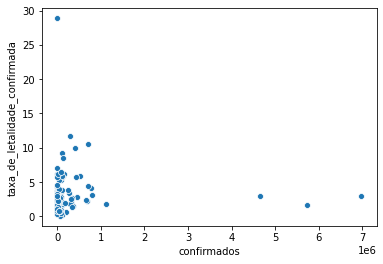

In [27]:
sns.scatterplot(data= casos_totais.query('confirmados > 1000'), x= 'confirmados', y= 'taxa_de_letalidade_confirmada')

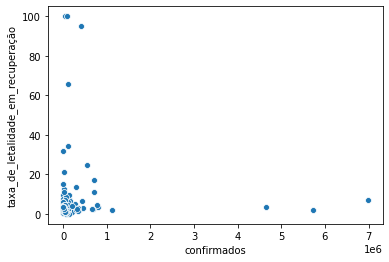

In [29]:
sns.scatterplot(data= casos_totais.query('confirmados > 1000'), x= 'confirmados', y= 'taxa_de_letalidade_em_recuperação')

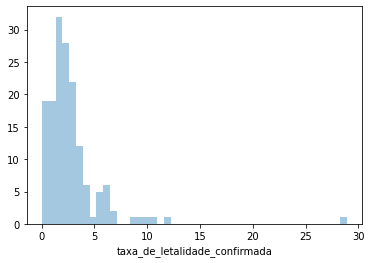

In [38]:
sns.distplot(casos_totais.query('confirmados > 1000')['taxa_de_letalidade_confirmada'], kde= False)

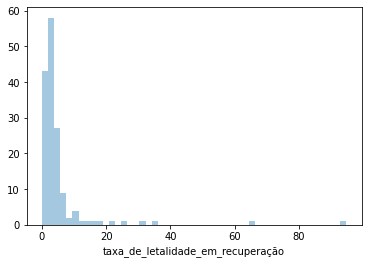

In [39]:
sns.distplot(casos_totais.query('recuperados > 1000')['taxa_de_letalidade_em_recuperação'], kde= False)

In [40]:
casos_totais.sort_values('taxa_de_letalidade_confirmada', ascending= False).query('confirmados > 1000').head(10)

,confirmados,mortes,recuperados,taxa_de_letalidade_confirmada,taxa_de_letalidade_em_recuperação
Pais,,,,,
Yemen,2029,586,1250,28.881222,31.917211
Italy,304323,35781,221762,11.757573,13.893214
Mexico,715457,75439,605796,10.544170,11.073859
United Kingdom,418889,41991,2282,10.024374,94.845617
Belgium,108768,9965,19123,9.161702,34.258113
Ecuador,131146,11213,102852,8.550013,9.830360
Chad,1171,82,1003,7.002562,7.557604
Sweden,90289,5878,0,6.510206,100.000000
Canada,151087,9297,130576,6.153408,6.646744


In [41]:
casos_totais.sort_values('taxa_de_letalidade_em_recuperação', ascending= False).query('recuperados > 1000').head(10)

,confirmados,mortes,recuperados,taxa_de_letalidade_confirmada,taxa_de_letalidade_em_recuperação
Pais,,,,,
United Kingdom,418889,41991,2282,10.024374,94.845617
Netherlands,107899,6361,3317,5.895328,65.726390
Belgium,108768,9965,19123,9.161702,34.258113
Yemen,2029,586,1250,28.881222,31.917211
France,536289,31524,95980,5.878174,24.723930
Greece,16627,366,1347,2.201239,21.366025
Spain,704209,31118,150376,4.418859,17.145470
Syria,3966,183,1013,4.614221,15.301003
Italy,304323,35781,221762,11.757573,13.893214
